# Machine Learning Intro

## TEIL A: Klassifikation von Iris Blumen


In dieser Aufgabe sehen wir uns das Iris Dataset an. Hierbei geht es darum die Blumen anhand ihrer Blütenblätter- (Petal) und Kelchblättermasse (Sepal) zu klassifizieren.

Wir importieren zuerst einmal einige Libraries die wir nutzen möchten.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import os
from sklearn.metrics import ConfusionMatrixDisplay

Nun laden wir das Iris Dataset, welches bereits in der Scikit-Learn Library angeboten wird. Wir speichern es auch in einem DataFrame

In [3]:
#load iris dataset
iris = datasets.load_iris()

#create pandas dataframe from iris
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['target_names'] = df_iris['target'].apply(lambda x: iris.target_names[x])

Eine Aufgabe, die von Machine Learning übernommen wird, ist die Klassifizierung. 

Dabei ist es die Aufgabe ein **Data Sample** (z.B. eine Katze oder einen Hund) aufgrund von bestimmten **Features** (z.B. Anzahl Streifen, Grösse) einer bestimmten Kategorie auch **Klasse** genannt zuzuweisen. Die einzelnen Data Samples sind jeweils mit einem **Label** gekennzeichnet, zu welcher Klasse sie gehören.

### Aufgabe 1
Zeigen Sie nun das Pandas Dataframe mit den Daten an.

**Fragen**

Was sind die Features die wir in diesem Beispiel nutzen?
>sepal width, sepal length, petal width, petal length, 

Was beinhaltet die Spalte target bzw. target_names?
>Dies sind die Labels

In [4]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Aufgabe 2
Wir zeigen nun die paarweise Kombination von den Features an.

**Frage**

Wenn Sie die Blumen von Auge anhand eines der Diagramme unterscheiden müssten.
Welche Feature Kombination würde sich gut eignen? Begründen Sie.
>Zum Beispiel petal width und petal length, da dort die Klassen relativ gut separiert sind.

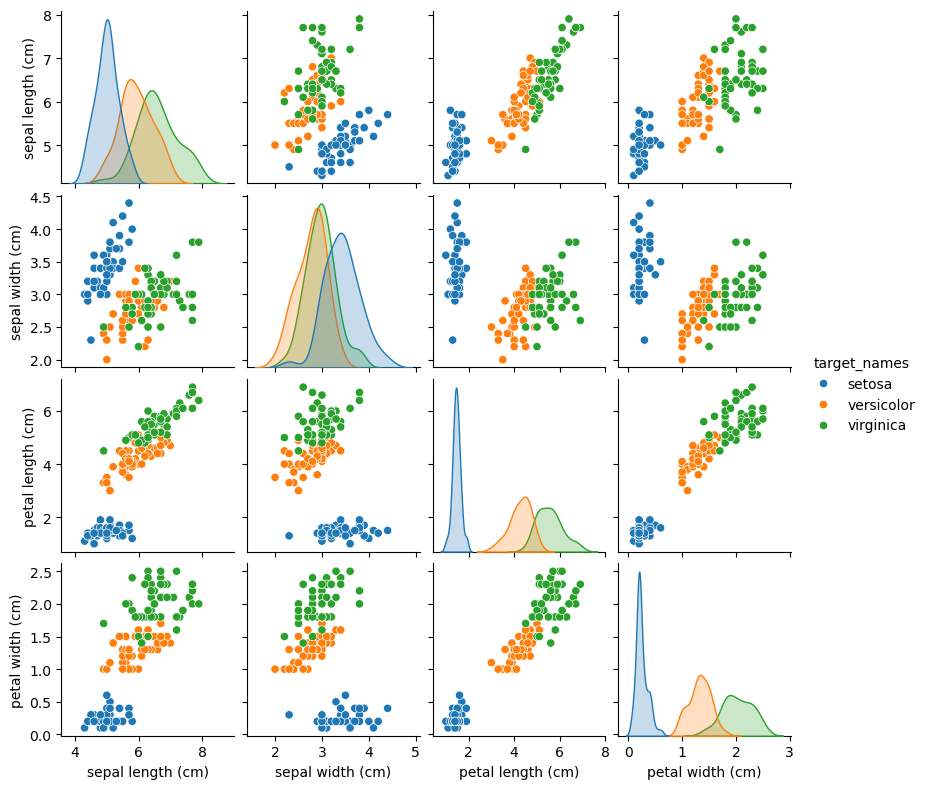

In [5]:
#plot the feature spaces with two features each
pairplt = sns.pairplot(df_iris.drop('target', axis=1), hue='target_names', height=2, palette='tab10')


### Aufgabe 3
In diesem Fall möchten wir nun die Blumen in die Klassen setosa (0), versicolor (1) und verginica (2) einteilen. Die Daten haben alle bereits die sogenannten **Labels** zugewiesen. Diese werden manchmal auch target genannt und sind in den Daten in den Spalten target und target_names vorhanden.

Wenn wir ein oder mehrere Features in einem mathematischen Raum kombinieren, entsteht ein sogennanter **Feature Space** (Merkmalsraum).
Ein solcher Feature Space für die *petal width* und *petal length* sieht wie folgt aus. 

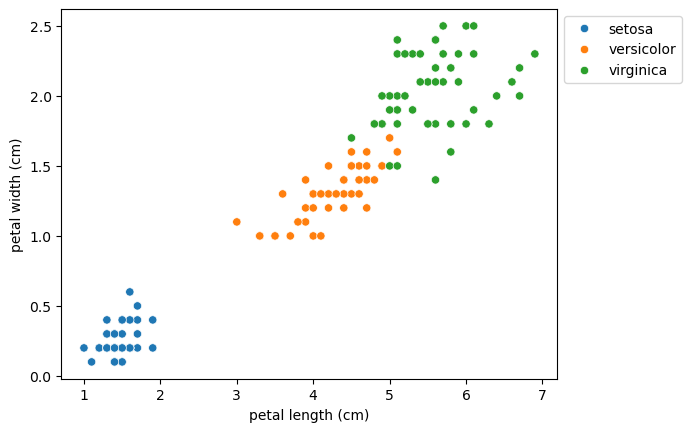

In [6]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='target_names', data=df_iris.drop('target', axis=1), palette='tab10')

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


**Fragen**

Wie viele Dimensionen hat der Feature Space im obigen Beispiel?
> Zwei Dimensionen, petal length und petal width

Wie viele Dimensionen können wir in einem Feature Space haben?
> Theoretisch beliebig viele grösser 0. Jedoch bringt jede Dimension weitere Komplexität zum Problem was sich in längerer Rechenzeit niederschlägt um die optimale Klassifikation zu berechnen.

### Aufgabe 4

Ein Machine Learning Model versucht eine oder mehrere **Decision Boundaries** also Entscheidungsgrenzen in den Feature Space zu platzieren, so dass möglichst viele Data Samples korrekt klassifiziert werden.

**Frage**

Beschreiben Sie wie Sie zwei linearen Decision Boundaries im Feature Space oben platzieren würden um die drei Klassen auseinanderzuhalten.
> Dies könnte man zum Beispiel machen, indem man bei petal width bei 0.8cm eine horizontale Decision boundary und bei petal length bei zirka 4.8cm eine senkrechte lineare Decision boundary gelegt wird.


### Aufgabe 5

Machine Learning Modelle treffen Entscheidungen anhand von Daten, welche Sie zu Beginn der «Kalibrierung» genutzt haben, um zu lernen. Man nennt diese Daten **Trainingsdaten**, da das Modell sozusagen damit trainiert wird. Wenn nun ein Machine Learning Modell getestet wird (heisst: wie gut funktioniert das Modell?), werden ihm neue Daten sogenannte **Testdaten** präsentiert, welche nicht für das Training genutzt wurden. 

**Fragen**

Was ist der Vorteil bei diesem Vorgehen? 
> Man kann nun prüfen ob das Modell gut generalisiert und somit mit ungesehenen Daten gut umgehen kann.

Was könnte ein Nachteil sein?
> Man muss genügend Daten haben um ein robustes Training durchführen zu können und dann auch noch zu testen. 
> Die Testdaten müssen realistisch sein und können nicht einfach nur erfunden sein.


### Aufgabe 6 

Damit wir Trainings- und Testdaten haben, teilen wir die Daten in Trainings und Testdaten ein. Das gleiche passiert auch mit den targets. Wir nutzen eine fertige Funktion von sklearn dafür.
Vielfach werden die Features in einer Variable X gespeichert und die Labels bzw. Targets in einer Variable y.

**Fragen**

Wie viele Data Samples sind nun im Trainings Dataset und wie viele im Testdataset?
> 120 im Trainingsdatenset und 30 im Testing

In [7]:
X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Ausgabe der Anzahl der Trainings- und Testdaten
print(f'Anzahl Trainingsdaten: {X_housing_train.shape[0]}')
print(f'Anzahl Testdaten: {X_housing_test.shape[0]}')

Anzahl Trainingsdaten: 120
Anzahl Testdaten: 30


### Aufgabe 7

Wir trainieren nun unseren ersten Classifier und testen diesen auch. 

Vorerst nutzen wir einen fixfertigen Classifier von Sklearn den wir instanziieren müssen und dann "fitten". Hinter der fit Funktion versteckt sich ein Trainingsprozess in dem das Modell von den Trainingsdaten lernt.
Vervollständige die Befehle anhand der Kommentare.

**Bemerkung:** Das Modell wurde extra so konfiguriert, dass nicht eine 100% Genauigkeit (Accuracy) resultiert, damit wir die Accuracy auswerten können. Deshalb erscheint auch eine **ConvergenceWarning**, diese können Sie **ignorieren**.

Wir evaluieren das Modell mittels der Accuracy. Diese wird berechnet indem die Anzahl korrekt klassifizierten Data Samples geteilt durch die Anzahl aller Data Samples gerechnet wird:

  $ Accuracy = \frac{\text{Anzahl korrekt klassifizierte Data Samples}}{\text{Alle Data Samples}} $


In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)

# Trainiere das Modell mit den Trainignsdaten als erstes Argument und den zugehörigen Labels als zweites Argument
mlp.fit(X_housing_train, y_housing_train)

# Vorhersage der Labels für die Testdaten
y_housing_pred = mlp.predict(X_housing_test)

# Berechne die Accuracy des Modells
# Dies können wir berechnen indem wir zählen, wie viele der vorhergesagten Labels mit den tatsächlichen Labels übereinstimmen und dies durch die Gesamtanzahl der Testdaten teilen
accuracy = np.sum(y_housing_pred == y_housing_test) / len(y_housing_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 93.33%


c:\ProgramData\anaconda3\envs\praktikum_ef\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Aufgabe 8

Wir schauen uns nun noch genauer an, welche Klassen am meisten verwechselt wurden. Dazu werden wir eine Konfusionsmatrix nutzen. Dabei werden die tatsächlichen Labels den vorhergesagten Labels gegenübergestellt und aufgezeichnet, wie oft jede Kombination vorkommt.


**Frage**
Betrachten Sie nun nochmals die paarweisen Feature Spaces aus Aufgabe 2 betrachten.
Welche zwei Klassen werden wohl am meisten verwechselt?
> Wahrscheinlich die Klassen virginica und versicolor, da diese in den meisten Featurespaces überlappen.

Lassen Sie nun die Zelle unten laufen und interpretieren Sie die Konfusionsmatrix. Stimmte ihre Vermutung?
> Ja.


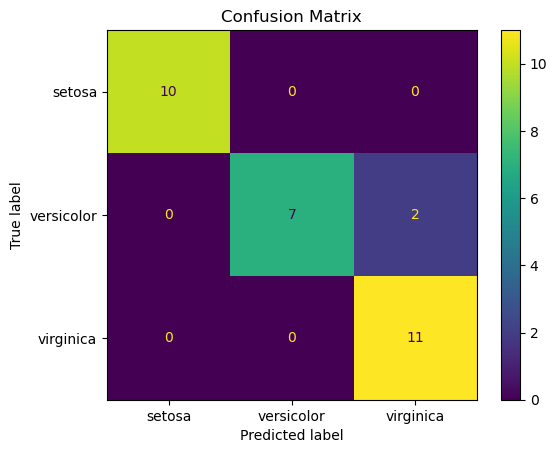

In [9]:
# Wir zeigen nun eine Konfusionsmatrix an, um die Leistung des Modells zu visualisieren. 

conf_matrix = ConfusionMatrixDisplay.from_predictions(y_housing_test, y_housing_pred, display_labels=iris.target_names)
conf_matrix.ax_.set_title('Confusion Matrix')
plt.show()

## Kontrollfragen Klassifikation

**Kontrollfrage 1**

Ein Machine-Learning Modell klassifiziert die Schüler*innen ob sie mit dem Velo, den ÖV oder zu Fuss zur Schule kommen. 
In den Daten wird pro Schüler*in und Tag erfasst, wie weit der Schulweg ist, wie lange die Reisedauer war, ob der/die Schüler*in ein Velo besitzt und wie weit die nächste ÖV-Haltestelle vom Wohnort entfernt ist.

Was sind in diesem Beispiel

    - Features?
    - Klassen?
    - Data Samples?
    
Was wäre ein Beispiel für eine Ein und Ausgabe des Modells?

>Klassen: Velo, ÖV, zu Fuss
>
>Features: Schulweg_Länge, Reisedauer, Velo_Ja_Nein, Distanz_ÖV
>
>Data-Samples: Einzelne Datensätze pro Schüler*in mit den Angaben zu den Features
>
>Ein Beispiel wäre
>Eingabe: 
>    Schulweg: 5
>    Reisedauer: 25
>    Velo: false oder 0
>    ÖV_Dist: 0.2
>Ausgabe:
>    ÖV (Klasse 1)




**Kontrollfrage 2**

Beschreiben Sie das Vorgehen, um ein Klassifikationsmodell zu evaluieren und dabei die Accuracy zu berechnen.

> Für die Testdaten sagt das Modell die Klassen voraus. Danach wird berechnet wie viele der Voraussagen korrekt waren und diese Anzahl wird durch die gesamte Anzahl an Test Data Samples geteilt. Somit hat man einen Prozentsatz, wie viele der Voraussagen korrekt waren.




## TEIL B: Regression mit Hauspreisberechnung

In diesem Dataset wurden verschiedene Eigenschaften von Liegenschaften erfasst. Dabei soll nun von den Eigenschaften auf den Hauspreis geschlossen werden. Der Hauspreis ist somit die **Zielvariable** oder engl. *Target*, ähnlich dem Label in der Klassifikation.

Die Berechnungen des Hauspreises, werden wir mit einem Regressionsmodell machen.

Das Dataset das wir benutzten, ist das California Housing Dataset:
https://media.geeksforgeeks.org/wp-content/uploads/20240522145850/housing%5B1%5D.csv

In [10]:
# load csv into a pandas dataframe
df_housing = pd.read_csv("datasets/housing.csv")

In [11]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Aufgabe 9

Die Daten beinhalten  Machine Learning Modelle benötigen die Daten als Zahlen um diese im Features Space abbilden zu können. Jedoch haben wir mit ocean_proximity ein Feature das Kategorische Daten enthält. Diese können wir mit dem sogenannten One-Hot-Encoding in einen mathematischen Raum übertragen. Dies geschieht indem wir für jede Kategorie eine neue Dimension anlegen und dort eine 1 vermerken wenn die Kategorie zutrifft und bei allen anderen eine 0. Wir nutzen dazu den One-Hot-Encoder von Scikit-learn.

Zusätzlich entfernen wir noch alle Data Samples die leere Werte haben.

In [12]:
# Encode ocean_proximity with one-hot-encoding
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(df_housing[['ocean_proximity']])
df_housing_encoded = pd.concat([df_housing, pd.DataFrame(ohe.transform(df_housing[['ocean_proximity']]), columns=ohe.get_feature_names_out(['ocean_proximity']))], axis=1)
df_housing_encoded.drop('ocean_proximity', axis=1, inplace=True)

# Remove rows with missing values, as these cannot be used for training the model
df_housing_encoded.dropna(inplace=True)

df_housing_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


### Aufgabe 10

Wir möchten nun noch die Daten normalisieren. Dies hilft einigen Modellen zum Beispiel künstlichen Neuronalen Netzwerken schneller zu optimieren und zu lernen.

Wir wenden die min-max-Skalierung an. Das heisst alle Features haben danach einen minimalen Wert von 0 und einen maximalen Wert von 1.

Wie könnten Sie dies berrechnen? Vervollständige danach den Code unten.

<details>
<summary><b>Tipp 1:</b> Klicke hier für den ersten Tipp.</summary>

Wie nutzen Sie das Minimum eines Features und das Maximum damit nachher alle Werte eines Features zwischen (inklusive) 0 und 1 sind?

</details>

<br>


<details>
<summary><b>Lösung:</b> Klicken Sie hier um die Formel anzuzeigen.</summary>

$scaled\_value = \frac{value-min}{max - min}$

</details>

In [13]:
 # Normalize numerical features with min max scaling

# Identify numerical features
numerical_features = df_housing_encoded.select_dtypes(include=['float64', 'int64']).columns

# Apply min-max scaling
for feature in numerical_features:
    min_value = df_housing_encoded[feature].min()
    max_value = df_housing_encoded[feature].max()
    df_housing_encoded[feature] = (df_housing_encoded[feature] - min_value) / (max_value - min_value)

df_housing_encoded

# prüfen ob die numerischen Features korrekt normalisiert wurden
assert (df_housing_encoded[numerical_features].min().min() >= 0) and (df_housing_encoded[numerical_features].max().max() <= 1), "Die numerischen Features wurden nicht korrekt normalisiert."

### Aufgabe 11

Unterteilen Sie das Dataset in ein Trainings und Testteil wie im vorherigen Abschnitt bereits gemacht.
Nutzen Sie auch einen Train/Test Split von 80/20.

In [14]:
# Unterteile das Dataset in Trainigns- und Testdaten. Die Spalte 'median_house_value' ist die Zielvariable, die wir vorhersagen möchten. Deshalb wird sie von den Features getrennt.

X_housing_train, X_housing_test, y_housing_train, y_housing_test = train_test_split(df_housing_encoded.drop('median_house_value', axis=1), df_housing_encoded['median_house_value'], test_size=0.2, random_state=42)


In [ ]:
#Tests um zu prüfen ob die Aufteilung korrekt ist
assert X_housing_train.shape[0] == 16346, f"Erwartete Anzahl Trainingsdaten: 16346, aktuell sind es: {X_housing_train.shape[0]}"
assert X_housing_test.shape[0] == 4087 , f"Erwartete Anzahl Testdaten: 4087, aktuell sind es: {X_housing_test.shape[0]}"

# Prüfen Sie ob median_house_value aus den Features entfernt wurde
assert 'median_house_value' not in X_housing_train.columns, "median_house_value wurde nicht aus den Features entfernt."

### Aufgabe 12

1. Nutzen Sie die MLPRegressor Klasse um ein Modell zu instantieren. Die Klasse wurde bereits am Anfang importiert. Sie können die gleichen Parameter verwenden wie in Aufgabe 7 beim MLPClassifier.
2. Trainieren Sie nun das Modell mit dem Aufruf der fit(Trainingsdaten, Targets) Methode.

Optional: Weitere Infos zur MLPRegressor Klasse: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

In [ ]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(10,), max_iter=800, random_state=42)

# Trainieren Sie das Modell mit den Trainignsdaten als erstes Argument und den zugehörigen Labels als zweites Argument
mlp_regressor.fit(X_housing_train, y_housing_train)

,"loss loss: {'squared_error', 'poisson'}, default='squared_error'The loss function to use when training the weights. Note that the""squared error"" and ""poisson"" losses actually implement""half squares error"" and ""half poisson deviance"" to simplify thecomputation of the gradient. Furthermore, the ""poisson"" loss internally usesa log-link (exponential as the output activation function) and requires``y >= 0``... versionchanged:: 1.7 Added parameter `loss` and option 'poisson'.",'squared_error'
,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(10,)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the regressor will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate ``learning_rate_`` at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when solver='sgd'.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",800
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True


### Aufgabe 13

Evaluieren Sie nun ihr Modell mit den Testdaten. Dieses Mal können wir aber nicht die Accuracy nutzen, da diese nur für Klassifikationen geeignet ist.
Wir nutzen stattdessen den Mean-Squared-Error. Dieser wird wie folgt berechnet:

- $y$: Echtes Label
- $\hat{y}$: Voraussage des Modells

$\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

In Prosa geschieht hier folgendes:
Für jedes Data Samples im Testdatenset wird das echte Label minus der Voraussage gerechnet. Dieses Ergebnis wird quadriert. Danach wird die Summe über alle diese quadrierten "Fehler" berechnet und geteilt durch die Anzahl Samples gerechnet. Somit der Mittelwert des quadrierten Fehlers.

Vervollständigen Sie den Code um den MSE zu berechnen.

In [17]:
# Evaluate the model on the test set with the MSE (Mean Squared Error) metric

y_housing_pred = mlp_regressor.predict(X_housing_test)

mse_test = np.sum((y_housing_pred - y_housing_test) ** 2) / len(y_housing_test)
print(f'Mean Squared Error on Test Set: {mse_test:.4f}')

Mean Squared Error on Test Set: 0.0197


### Aufgabe 14
Führen Sie die Code-Zelle unten aus. Dabei wird für ein Datasample aus dem Test Dataset der Hauspreis berechnet.

Was fällt Ihnen bei dieser Vorhersage auf?

> Wir haben die Daten, also auch die Zielvariable mit dem Min-Max-Normalisierung skaliert. Dies müssen wir nun bei einer Voraussage wieder rückgängig machen. Eine Lösung ist das Minimum und Maximum der Hauspreise aus den Daten zu speichern und die Skalierung umzukehren: $ value = \text{scaled\_value} * (max - min) + min$

Weshalb ist die Vorhersage in dieser Grössenordnung und wie könnten Sie dieses Problem lösen?

<br>
<details>
<summary><b>Tipp 1:</b> Klicke hier für den einen Tipp.</summary>

Wir haben auch den House Value mit Min Max Normalisierung skaliert. Wie könnte man dies nun zu einem korrekten Hauswert zurückrechnen?

</details>



In [18]:
# Example prediction for a single test instance

y_housing_pred_single = mlp_regressor.predict(X_housing_test[:1])
print(f'Der berechnete Hauswert beträgt: {y_housing_pred_single[0]:.2f}')

y_pred_scaled = y_housing_pred_single * (df_housing['median_house_value'].max() - df_housing['median_house_value'].min()) + df_housing['median_house_value'].min()
print(f'Der berechnete Hauswert im Originalmaßstab beträgt: {y_pred_scaled[0]:.2f}')


Der berechnete Hauswert beträgt: 0.33
Der berechnete Hauswert im Originalmaßstab beträgt: 175630.85


### Aufgabe 15

Wir zeigen nun in einem Scatter Plot noch einige zufällige Datenpunkte an, wobei wir vergleichen möchten was der echte Hauspreis ist und was unser Modell berechnet hat.
Lassen Sie die nächste Code Zelle laufen und beantworten Sie die folgende Frage.

**Frage**
Woran erkennt man einen kleinen Fehler des Modells und wie einen grossen?
> Indem man den Abstand der beiden Punkte betrachtet. Ein grosser Abstand entspricht einem grossen Fehler und ein kleiner Abstand einen kleinen.

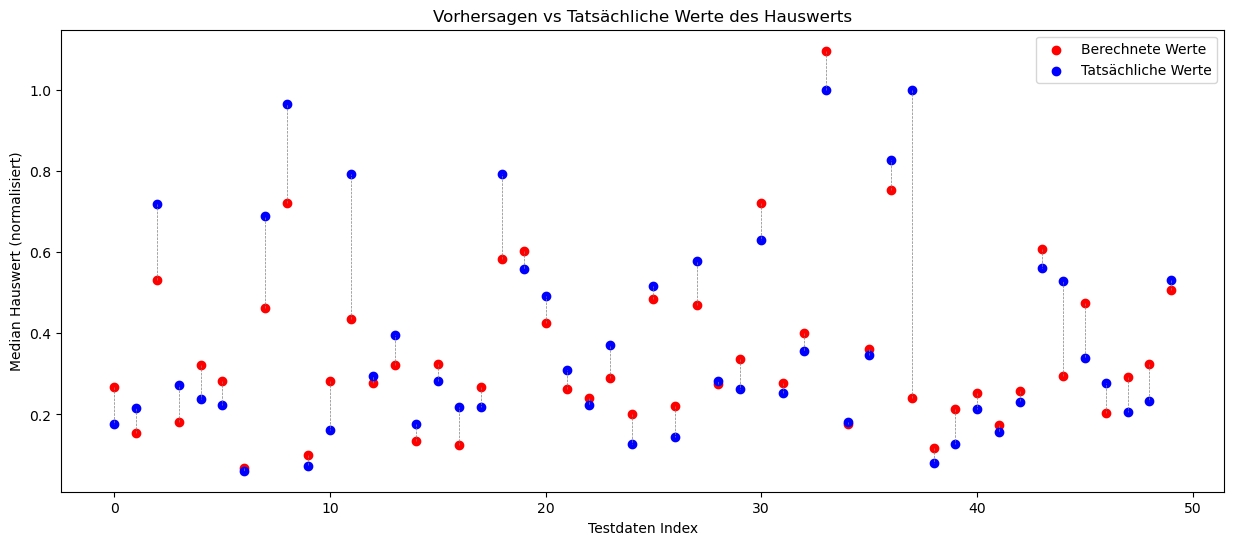

In [19]:
# Plotte die Vorhersagen des Modells gegen die tatsächlichen Werte nutze aber nur 50 zufällige Datenpunkte und zeichne den Fehler als Linie ein

random_indices = np.random.choice(len(y_housing_test), size=50, replace=False)
y_housing_pred_sampled = y_housing_pred[random_indices]
y_housing_test_sampled = y_housing_test.iloc[random_indices]


plt.figure(figsize=(15, 6))
plt.scatter(range(len(y_housing_pred_sampled)), y_housing_pred_sampled, color='red', label='Berechnete Werte')
plt.scatter(range(len(y_housing_test_sampled)), y_housing_test_sampled, color='blue', label='Tatsächliche Werte')
for i in range(len(y_housing_pred_sampled)):
    plt.plot([i, i], [y_housing_pred_sampled[i], y_housing_test_sampled.iloc[i]], color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Testdaten Index')
plt.ylabel('Median Hauswert (normalisiert)')
plt.title('Vorhersagen vs Tatsächliche Werte des Hauswerts')
plt.legend()
plt.show()

### Zusatzaufgabe 16: Teste das Training ohne min-max Normalisierung (Zuerst 10, 14 lösen)

Führe nochmals einen Traingslauf durch ohne, dass die min-max Skalierung genutzt wurde.
Beobachte wie lange das Training nun läuft. 

**Frage**: Was ist schneller? Min-Max normalisierte Daten oder die ursprünglichen Daten?

>Das Training benötigt plötzlich mehrere Sekunden anstatt einem Bruchteil einer Sekunde.

## Kontrollfragen: Regression



**Kontrollfrage 3**

Was ist der Output einer Regression und wie verhält sich dieser im Vergleich zu der Klassifikation?
> Die Regression hat einen numerischen und kontinuierlichen Output. Im Vergleich zur Klassifikation welche diskrete Klassen als Ausgabe hat.


**Kontrollfrage 4**

Welchen Vorteil hat die Normalisierung der numerischen Features gebracht? Wie lautete die Formel?
> Der Vorteil war, dass das Training des Modells viel schneller war.
>
> $scaled\_value = \frac{value-min}{max - min}$ 